In [1]:
#Unsupervised Machine Learning 2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
cols = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
df1 = pd.read_csv("winequality-red.csv",sep =";")
df1["WineType"] = 0 # Red wine is 0
df2 = pd.read_csv("winequality-white.csv",sep=";")
df2["WineType"] = 1
df = pd.concat([df1,df2],axis=0)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  WineType  
0         9.4        5         0  
1         9.8        5         0  
2         9.8        5         0  
3         9.8        6         0  
4         9.4        5         0  
...       ...      ...       ...  
4893     11.2        6         1  
4894      9.6        5         1  
4895      9.4        6         1  
4896     12.8        7         1  
4897     11.8        6         1  

[6497 rows x 13 columns]

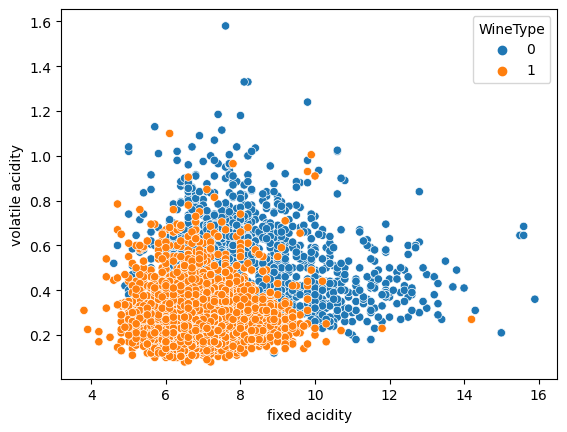

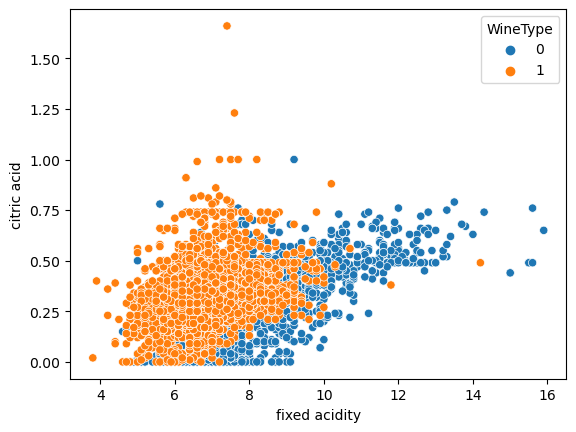

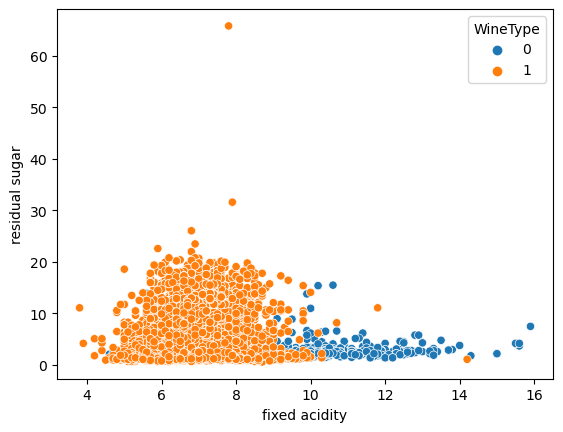

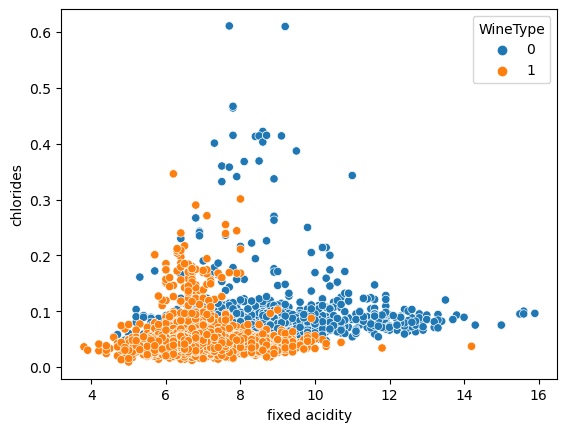

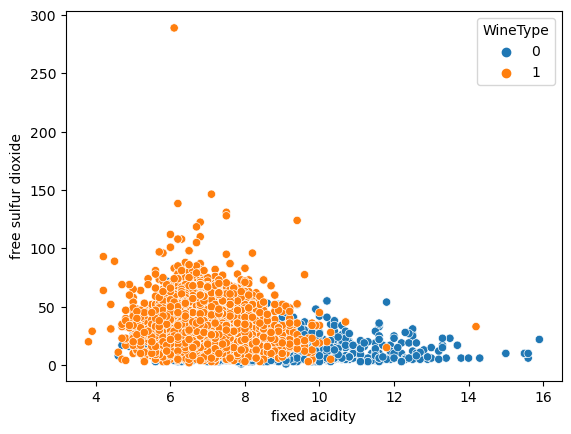

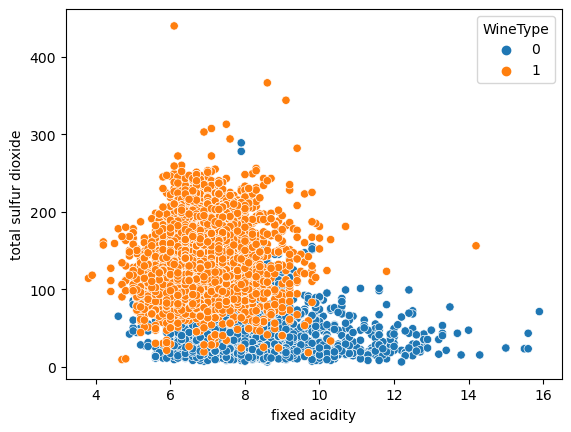

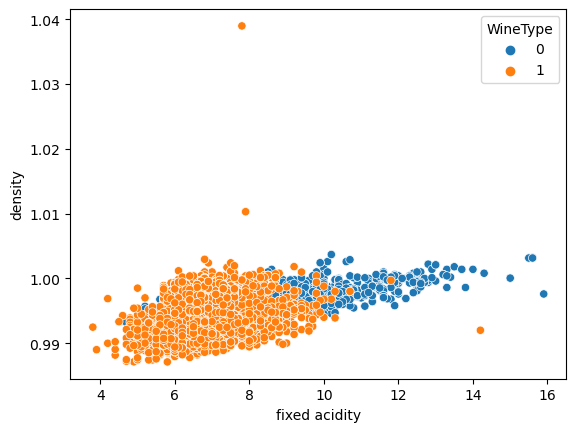

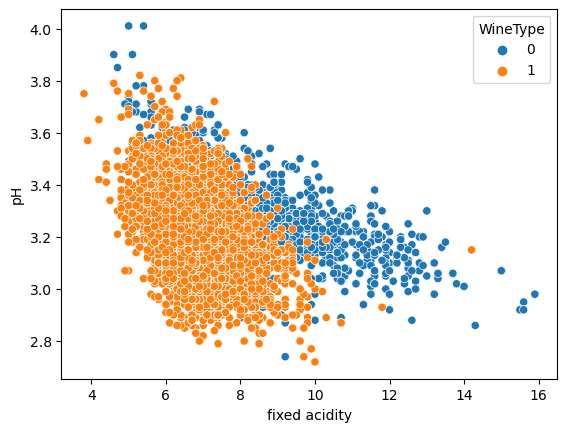

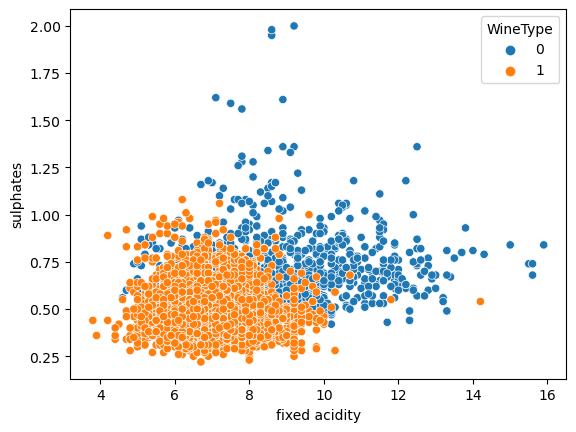

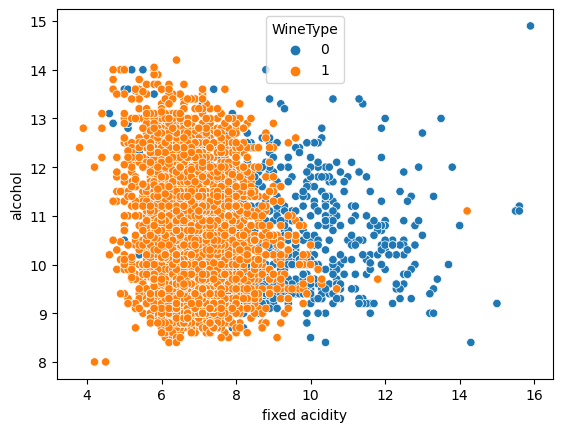

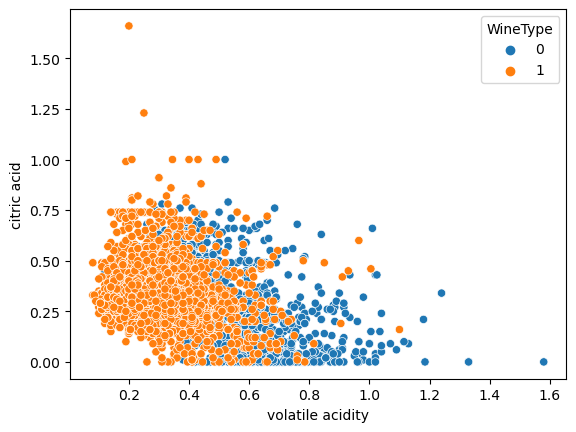

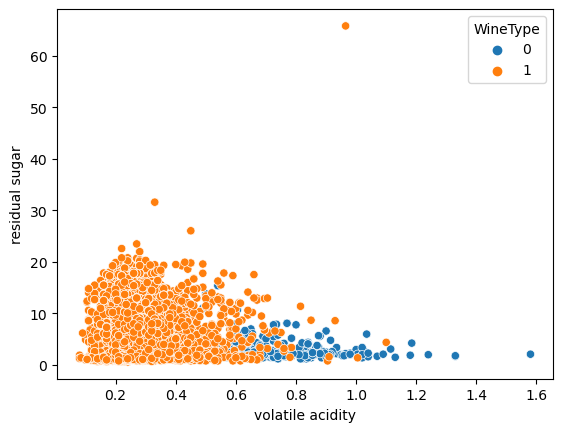

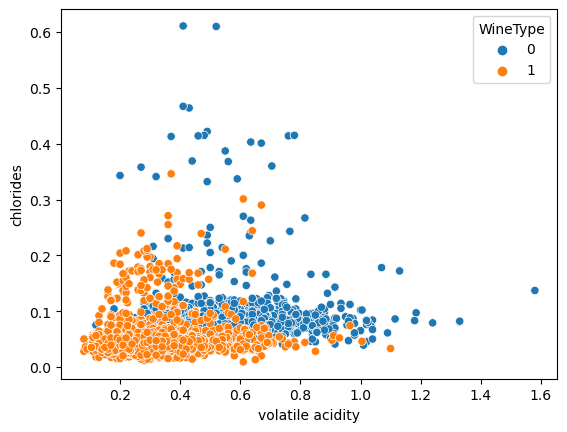

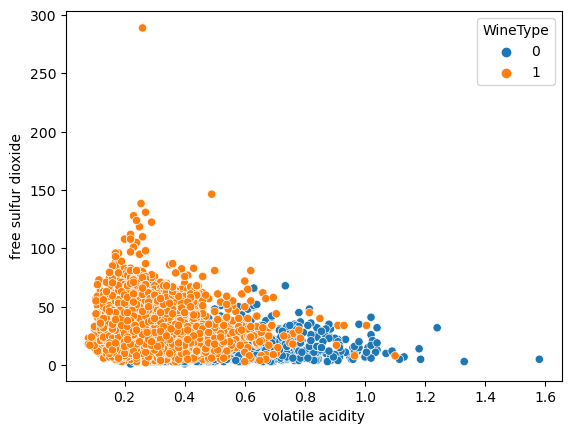

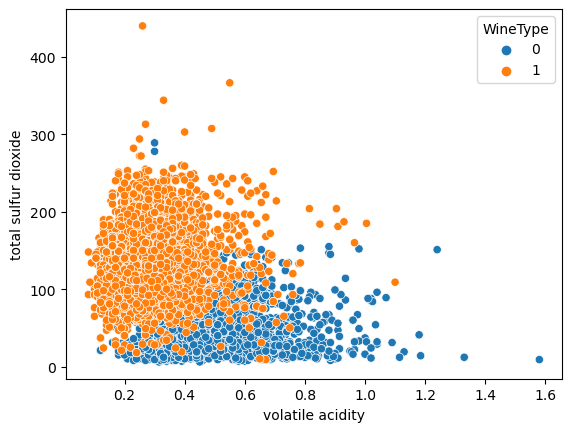

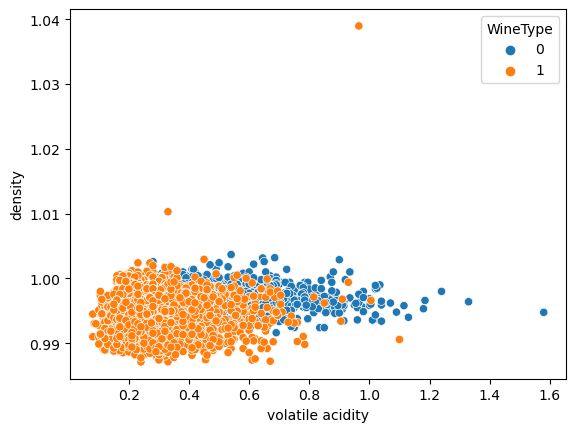

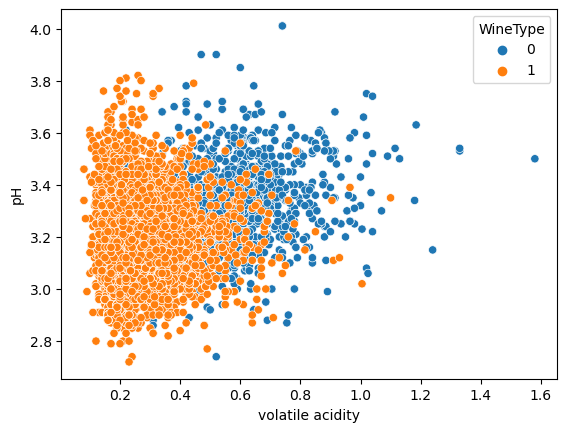

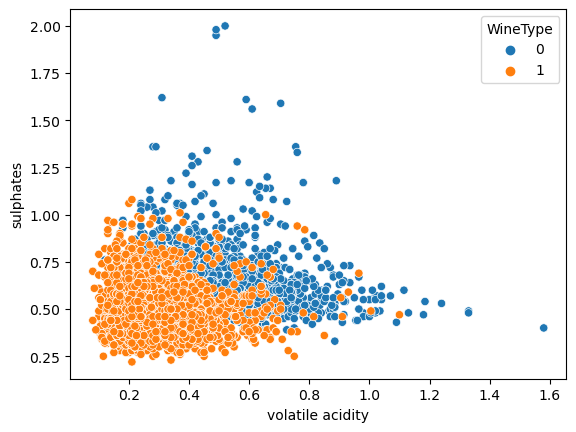

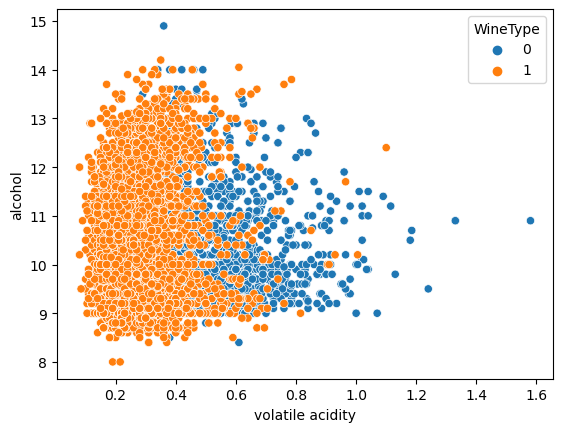

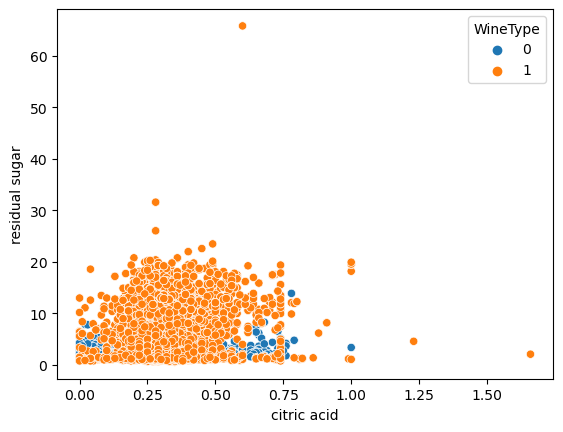

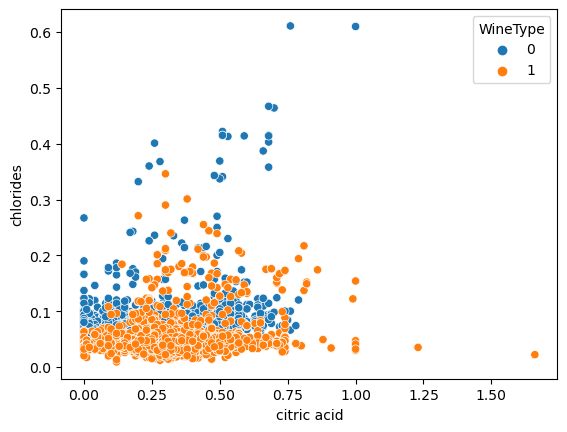

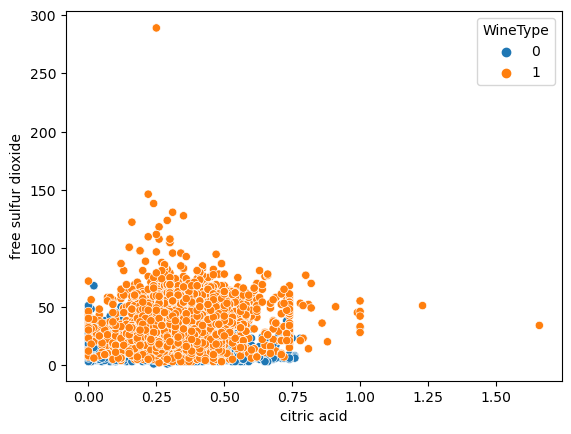

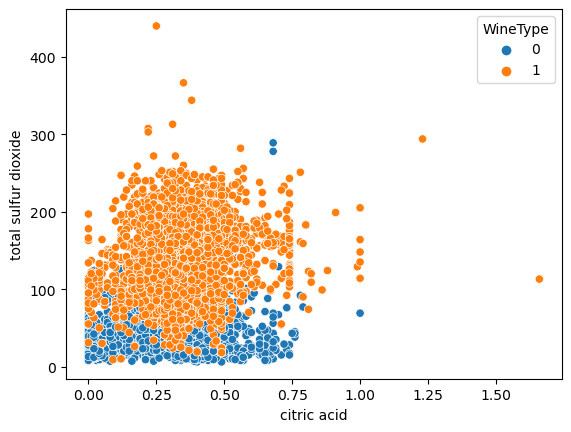

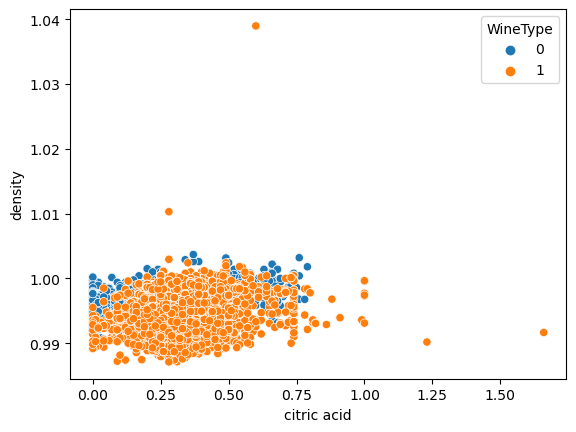

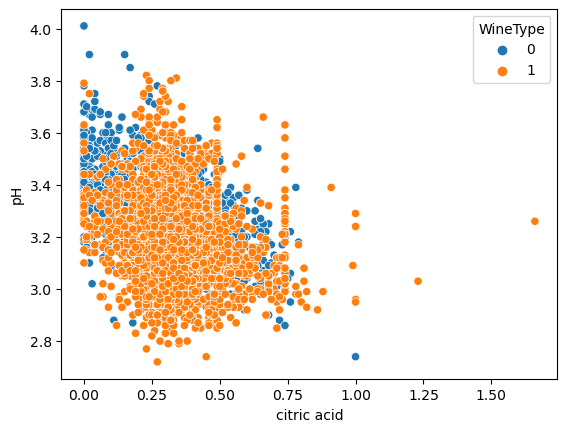

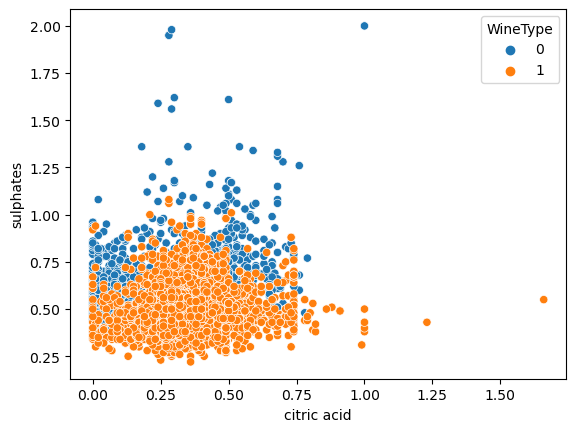

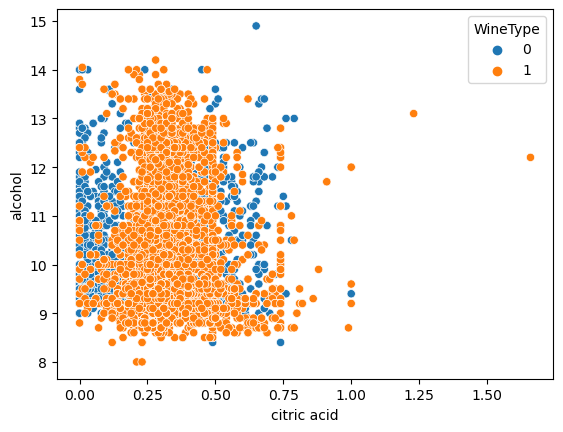

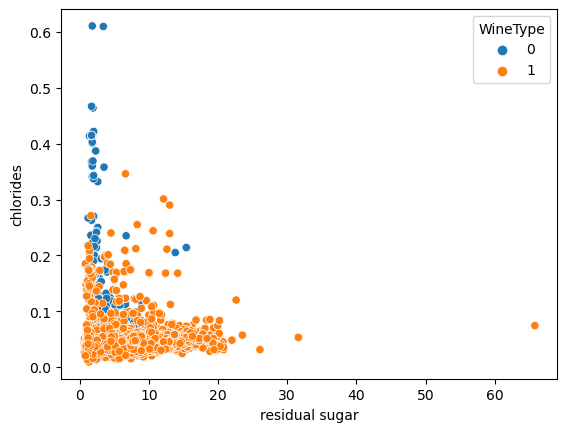

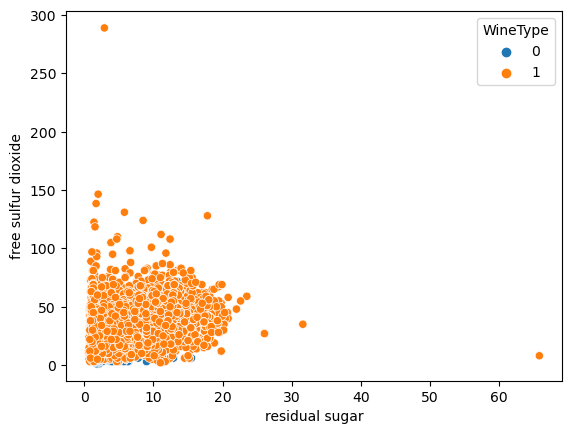

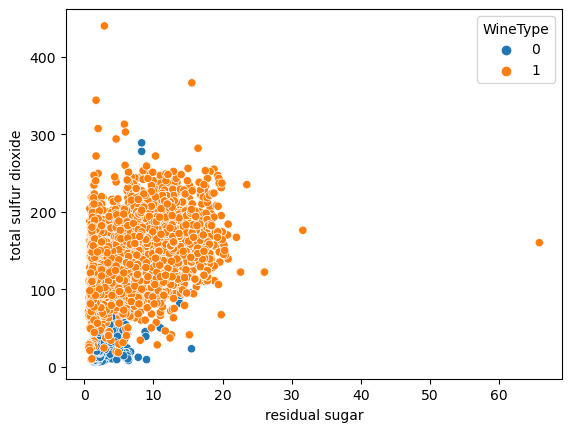

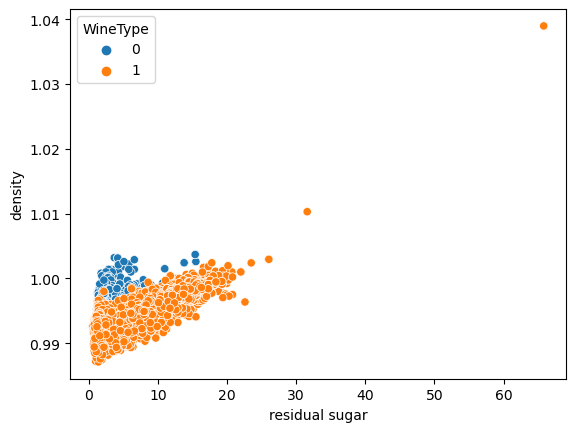

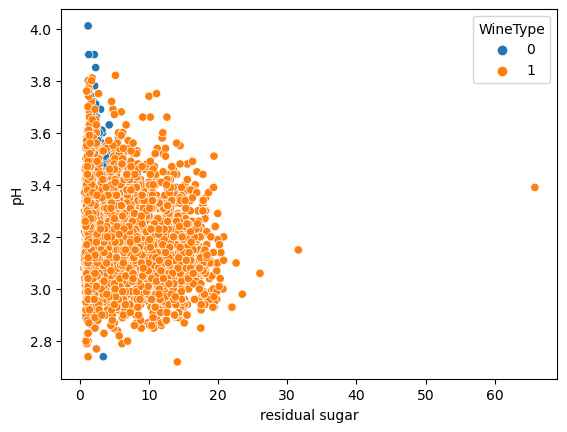

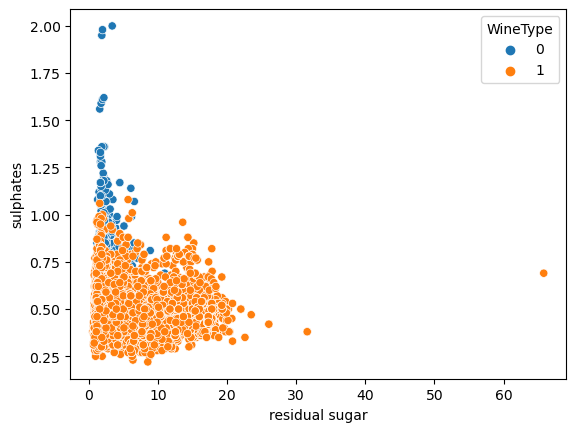

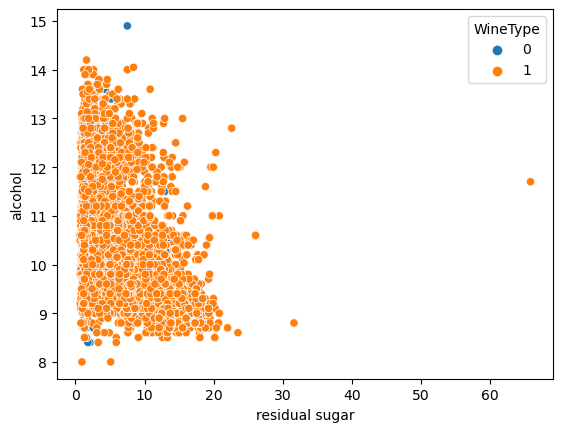

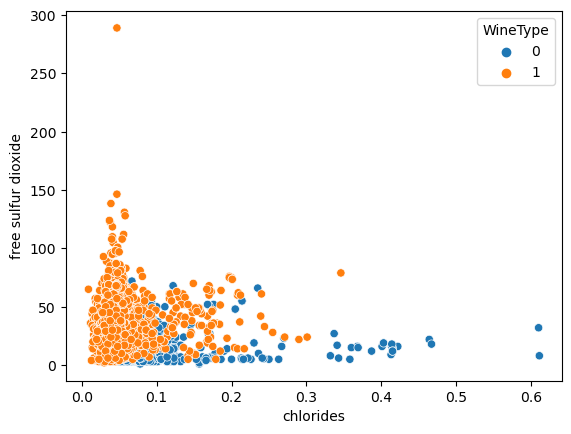

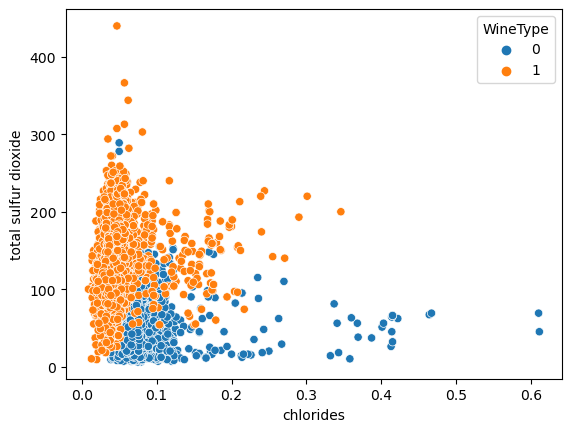

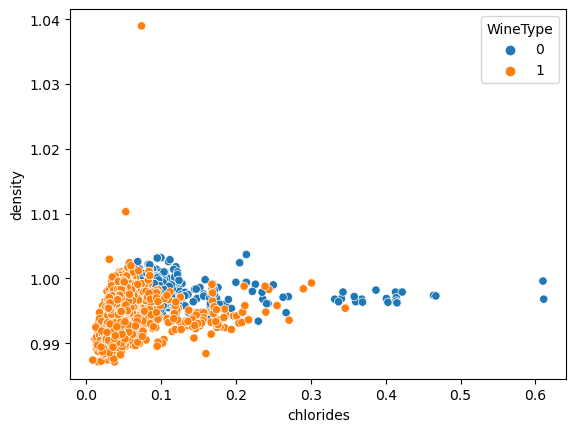

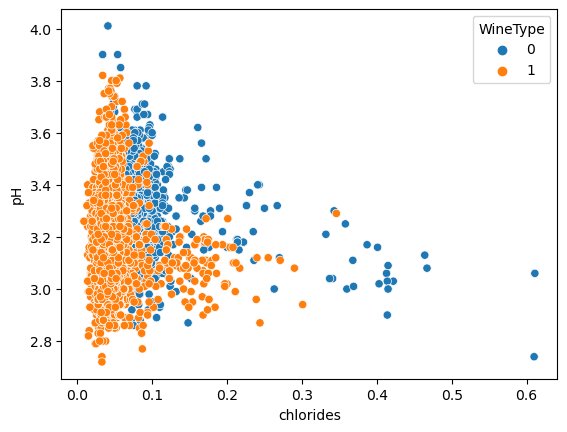

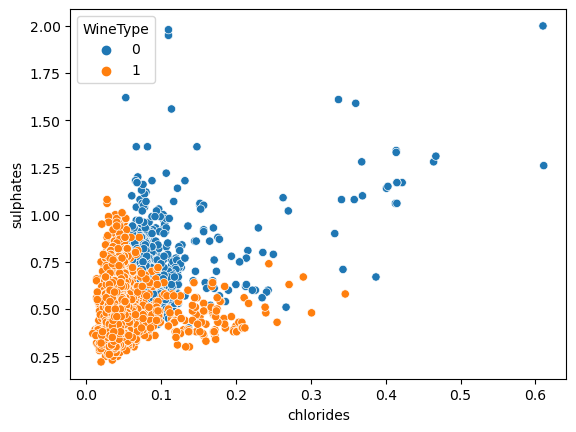

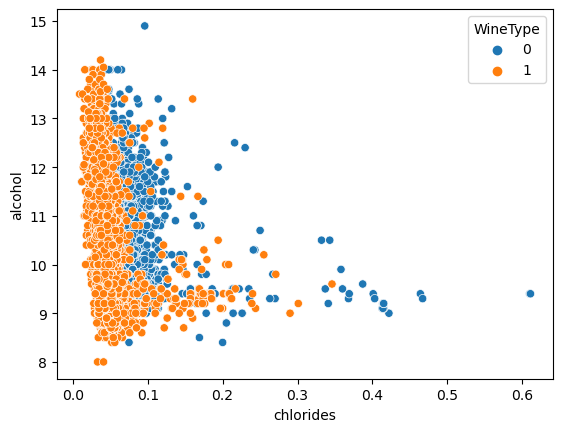

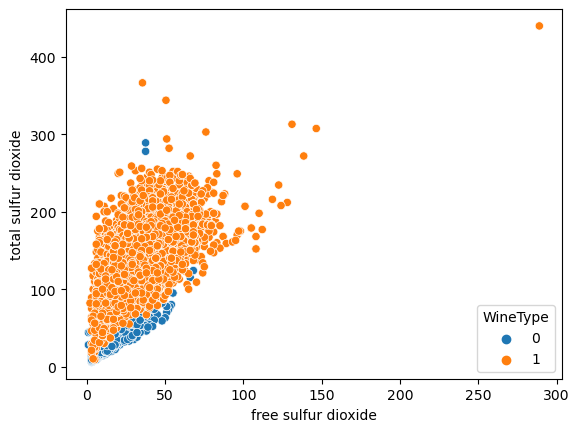

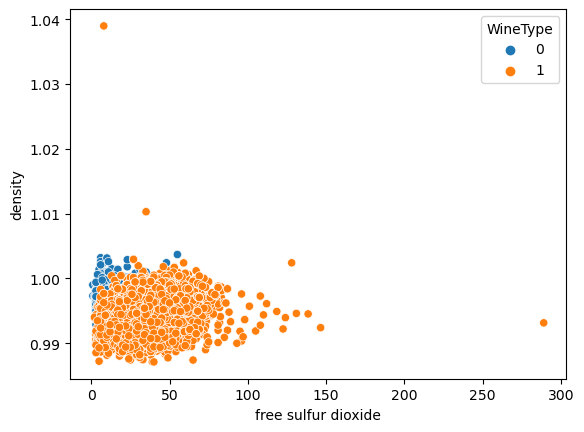

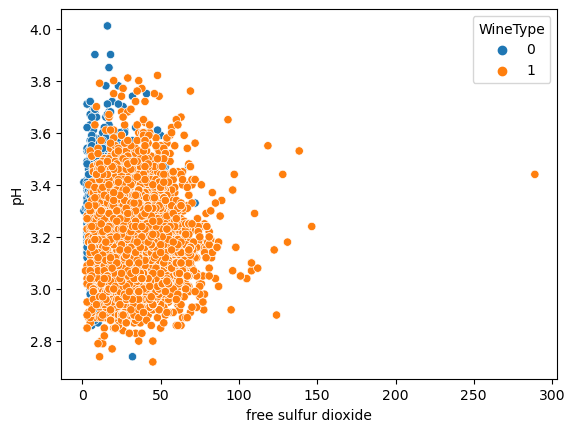

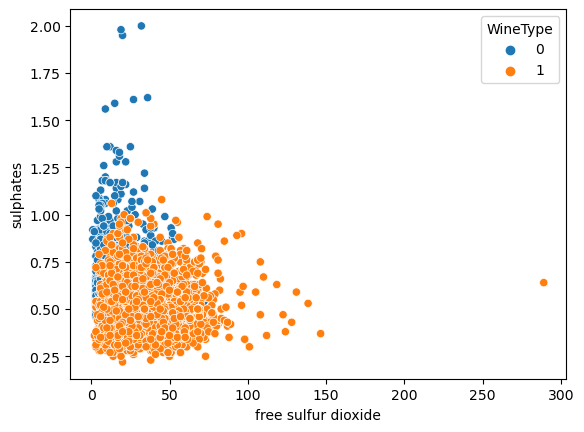

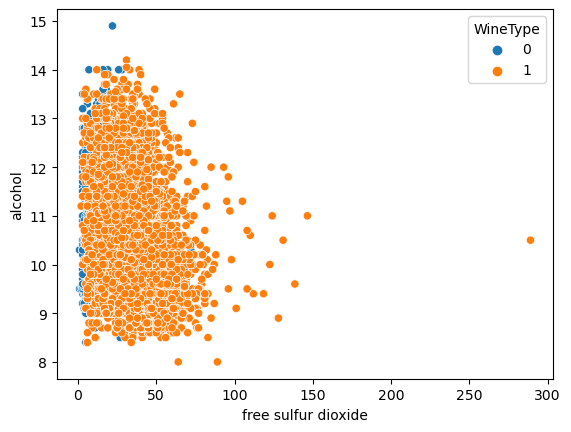

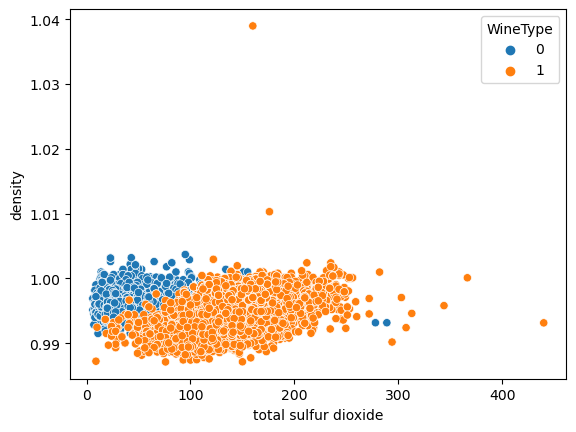

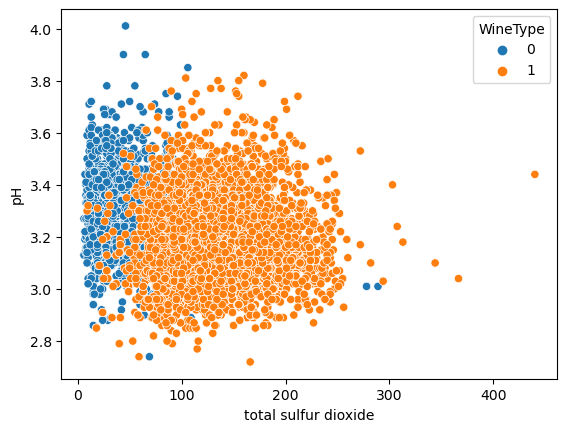

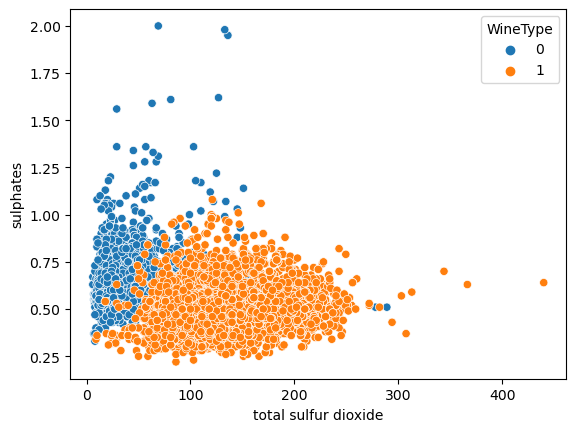

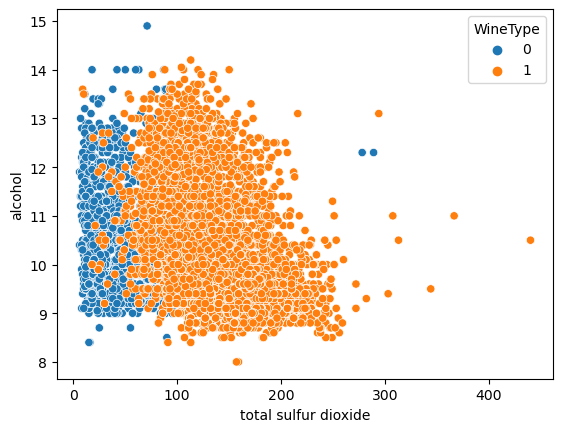

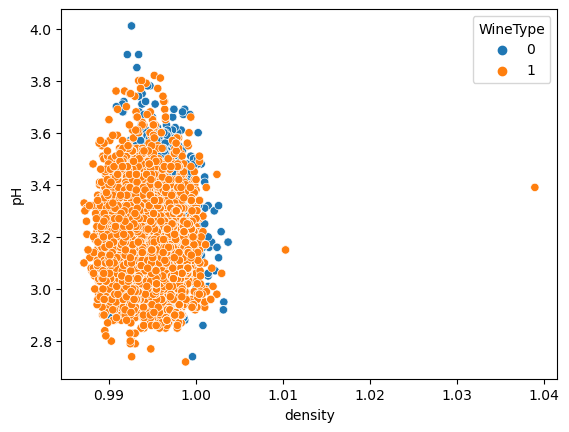

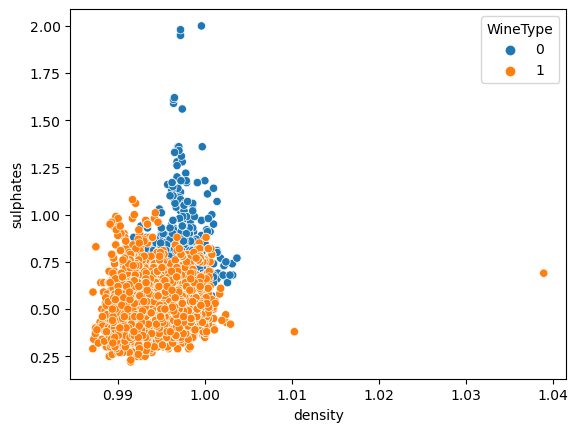

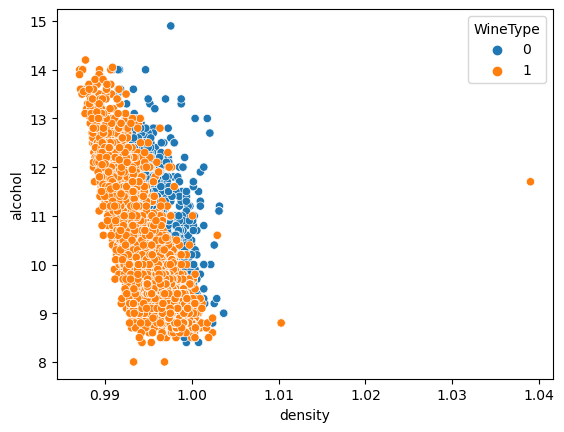

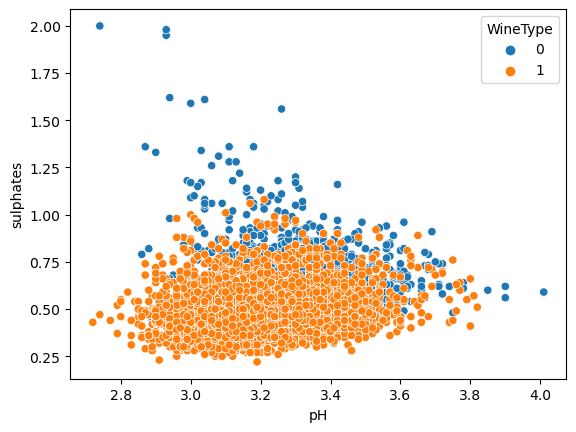

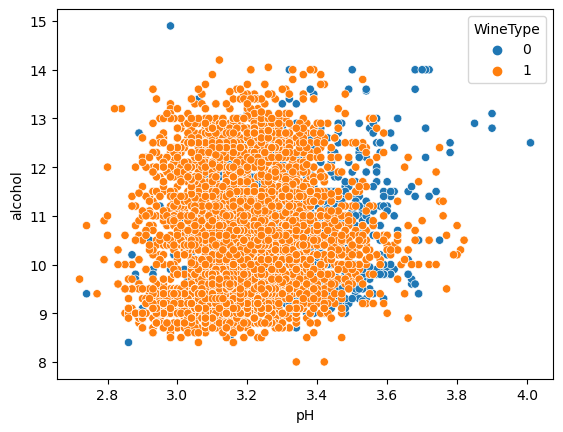

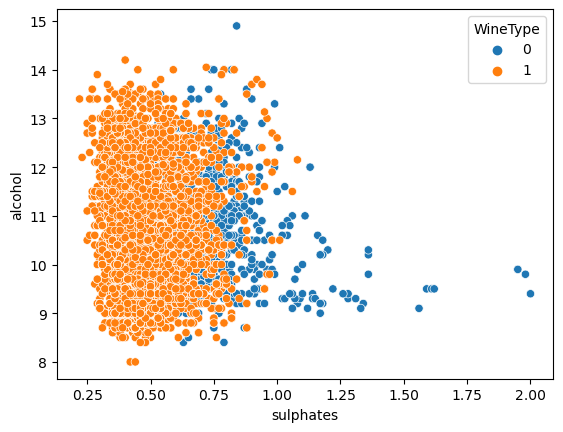

In [6]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='WineType')
    plt.show()

In [10]:
x = "alcohol"
y = "sulphates"
X = df[[x,y]].values
kmeans = KMeans(n_clusters = 2).fit(X)
clusters = kmeans.labels_
clusters

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

[]

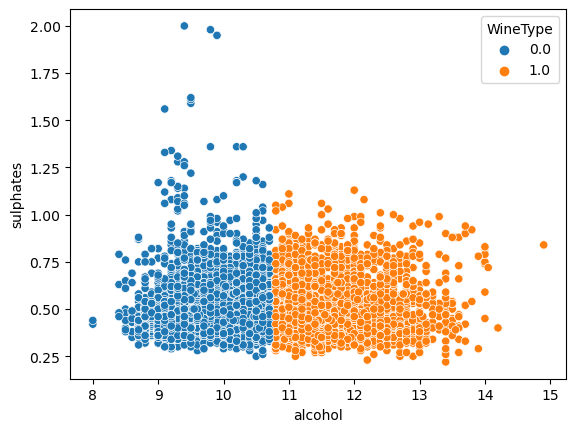

In [11]:
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns=[x,y,"WineType"])
sns.scatterplot(x=x, y=y, hue='WineType', data=cluster_df)
plt.plot()

[]

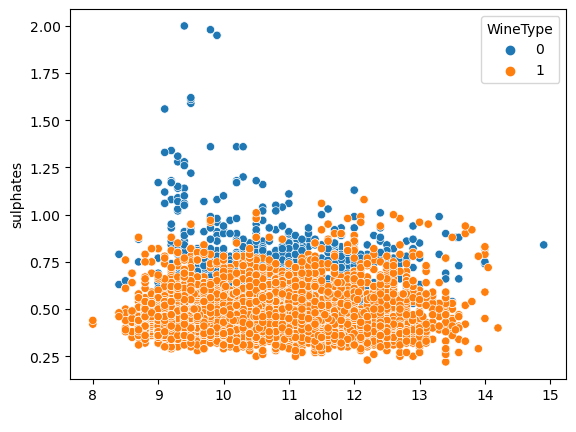

In [12]:
sns.scatterplot(x=x, y=y, hue='WineType', data=df)
plt.plot()

In [ ]:
#This is not the best example of the algorithm accuratley splitting the data in 2

In [20]:
#PCA - 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

[]

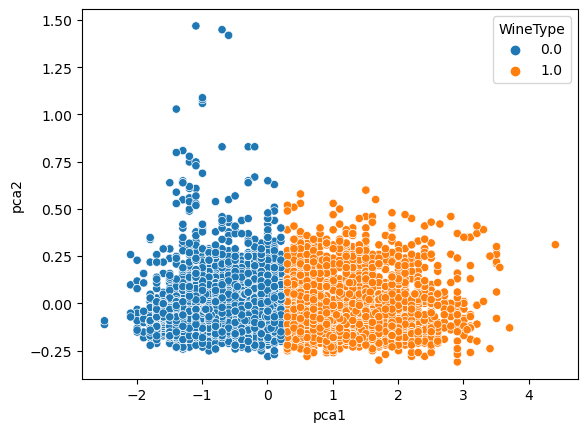

In [21]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "WineType"])
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["WineType"].values.reshape(-1, 1))), columns=["pca1", "pca2", "WineType"])
# K Means classes
sns.scatterplot(x="pca1", y="pca2", hue='WineType', data=kmeans_pca_df)
plt.plot()

[]

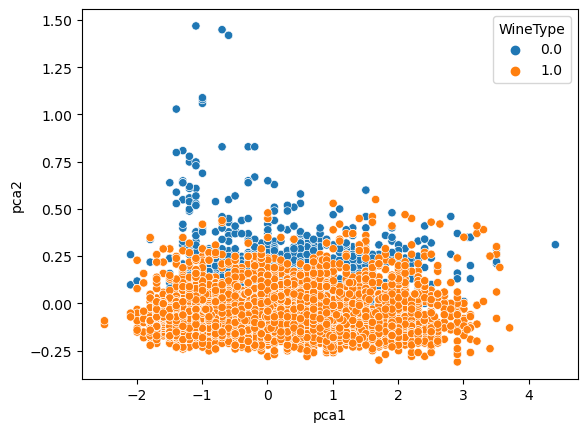

In [17]:
# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue='WineType', data=truth_pca_df)
plt.plot()